In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
class Environment:
    def __init__(self, ph, goal):
        self.ph = ph
        self.goal = goal
    def possible_states(self) -> np.ndarray:
        """
        :return: array contendo todos os estados possíveis, neste caso, lista [1, 2 ...., goal-1]
        os estados 0 e 100 não existem de verdade no problema, e são apenas utilizados como terminais
        """
        return np.array(range(1, self.goal))

    def possible_actions(self, state: int) -> np.ndarray:
        """
        :param state: estado a se obter as ações possíveis
        :return: array contendo todas as possíveis ações, dado um estado
        """
        return np.array(range(1, min(state, self.goal-state)+1))

    def expected_return(self, state: int, action: int, values: np.ndarray) -> float:
        """
        :param state: estado no qual queremos calcular retorno esperado
        :param action: ação realizada
        :param values: array numpy contendo os retornos esperados até agora
        :return: retorno o esperado deste estado, dado a ação
        """
        # Apenas aplicamos a fórmula do livro, probabilidade de vencer multiplicado por 1 caso seja igual ou ultrapasse $100 somado com o valor esperado do próximo estado, mais a probabilidade de perder, multiplicado pelo valor esperado neste próximo estado
        returns = self.ph * ((1 if state + action >= 100 else 0) + values[min(state+action, 100)]) + \
                  (1 - self.ph) * (values[max(state - action, 0)])
        return returns

def evaluate_greedy_policy(env: Environment, values: np.ndarray) -> float:
    """
    Utilizamos value iteration para atualizar os valores e obter uma policy. Iremos realizar múltiplas iterações sobre todos os estados, atualizando seus valores esperados seguindo sempre a ação dada por uma policy gulosa.
    :param env: Ambiente do problema
    :param values: Array numpy contendo os retornos esperados de cada estado
    :return: valor delta, maior diferença entre um estado antigo e um estado novo
    """
    delta = 0
    for state in env.possible_states():
        prev = values[state]
        # calculamos todos os action values do estado
        action_values = calculate_action_values(env, state, values)
        # escolhemos para o retorno esperado, o maior entre todos os action-values, ou seja, escolhemos de forma gulosa
        values[state] = action_values[random_argmax(action_values)]
        delta = max(delta, abs(prev - values[state]))
    return delta

def random_argmax(array: np.ndarray) -> int:
    """
    :param array: Array numpy unidimensional
    :return: endereço escolhido aleatoriamente para um valor máximo
    """
    return np.random.choice(np.flatnonzero(array == array.max(initial=0)))

def calculate_action_values(env: Environment, state: int, values: np.ndarray) -> np.ndarray:
    """
    :param env: Ambiente onde se passa o problema
    :param state: estado atual
    :param values: Array numpy contendo os retornos esperados de cada estado
    :return: array contendo todos os action values possíveis a partir deste estado
    """
    action_values = []
    # para cada ação possível, calculamos os valores esperados de retorno
    for action in env.possible_actions(state):
        action_values.append(env.expected_return(state, action, values))
    return np.array(action_values)

def greedy_policy(env: Environment, values: np.ndarray) -> np.ndarray:
    """
    :param env: Ambiente onde se passa o problema
    :param values: Array numpy contendo os retornos esperados de cada estado
    :return: array numpy de uma policy gulosa
    """
    policy = []
    for state in env.possible_states():
        # para cada estado, calculamos seus action values
        action_values = calculate_action_values(env, state, values)
        greedy_action = np.argmax(action_values)
        # greedy_action = random_argmax(action_values)
        # em seguida apenas adicionamos a ação que maximiza o action value à policy
        policy.append(greedy_action)
    return np.array(policy)

def iterate(env:Environment, values:np.ndarray, theta: float) -> np.ndarray:
    """
    :param env: Ambiente onde se passa o problema
    :param values: Array numpy contendo os retornos esperados de cada estado
    :param theta: Parâmetro de convergência
    :return: uma policy gulosa para a resolução do problema
    """
    while True:
        delta = evaluate_greedy_policy(env, values)
        # enquanto delta < theta, continuamos aplicando value-iteration
        if delta < theta:
            break
        print(f"Delta: {delta}, Theta: {theta}")
    return greedy_policy(env, values)

In [16]:
env = Environment(0.40, 100)
values = np.zeros(env.goal + 1)
policy = iterate(env, values, 1e-20)

Delta: 0.9533440000000001, Theta: 1e-20
Delta: 0.3688960000000001, Theta: 1e-20
Delta: 0.13926400000000005, Theta: 1e-20
Delta: 0.05570560000000002, Theta: 1e-20
Delta: 0.02228224000000001, Theta: 1e-20
Delta: 0.008912896000000003, Theta: 1e-20
Delta: 0.0016384000000000008, Theta: 1e-20
Delta: 0.0003932160000000005, Theta: 1e-20
Delta: 7.602595430399994e-05, Theta: 1e-20
Delta: 3.041038172160032e-05, Theta: 1e-20
Delta: 2.6418075402233343e-06, Theta: 1e-20
Delta: 9.045549017728909e-07, Theta: 1e-20
Delta: 7.815354352569415e-08, Theta: 1e-20
Delta: 1.8756850440893036e-08, Theta: 1e-20
Delta: 5.230363003816407e-09, Theta: 1e-20
Delta: 1.869841788348925e-09, Theta: 1e-20
Delta: 7.479367151660976e-10, Theta: 1e-20
Delta: 1.8698417900836484e-10, Theta: 1e-20
Delta: 4.8203025772297625e-11, Theta: 1e-20
Delta: 1.928121030891905e-11, Theta: 1e-20
Delta: 1.6749952119754496e-12, Theta: 1e-20
Delta: 5.735177957544302e-13, Theta: 1e-20
Delta: 4.955064136780152e-14, Theta: 1e-20
Delta: 1.1893264151

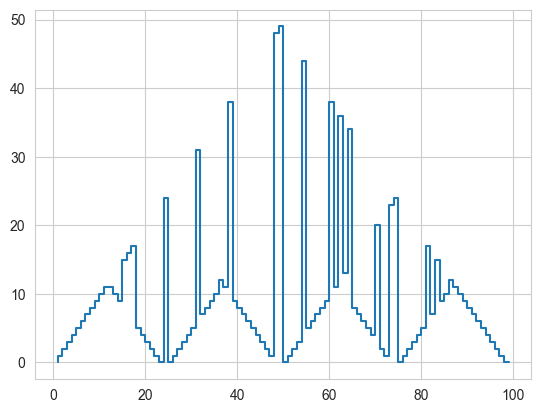

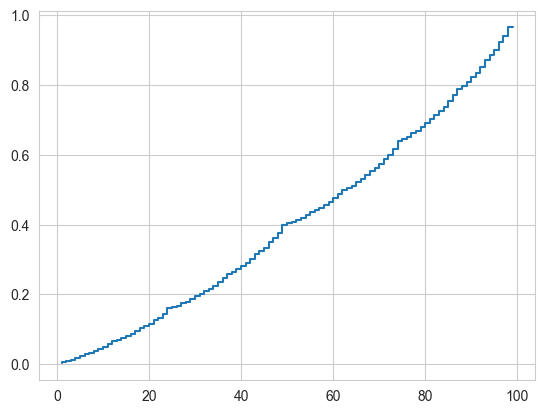

In [17]:
plt.step(env.possible_states(), policy)
plt.show()
plt.step(env.possible_states(), values[1:-1])
plt.show()

In [18]:
env = Environment(0.75, 100)
values = np.zeros(env.goal+1)
policy = iterate(env, values, 1e-20)

Delta: 0.999755859375, Theta: 1e-20
Delta: 0.749267578125, Theta: 1e-20
Delta: 0.560302734375, Theta: 1e-20
Delta: 0.42022705078125, Theta: 1e-20
Delta: 0.3151702880859375, Theta: 1e-20
Delta: 0.23637771606445312, Theta: 1e-20
Delta: 0.13348388671875, Theta: 1e-20
Delta: 0.0588880330324173, Theta: 1e-20
Delta: 0.05391823500394821, Theta: 1e-20
Delta: 0.05091038695536554, Theta: 1e-20
Delta: 0.0483007656148402, Theta: 1e-20
Delta: 0.04440035054449254, Theta: 1e-20
Delta: 0.040094582070821616, Theta: 1e-20
Delta: 0.038412824874406226, Theta: 1e-20
Delta: 0.03583831091808065, Theta: 1e-20
Delta: 0.033566966518404184, Theta: 1e-20
Delta: 0.03102202841821622, Theta: 1e-20
Delta: 0.028223431576666624, Theta: 1e-20
Delta: 0.025749880262082803, Theta: 1e-20
Delta: 0.023022388728172305, Theta: 1e-20
Delta: 0.02108483079771284, Theta: 1e-20
Delta: 0.01919997801240625, Theta: 1e-20
Delta: 0.017137813139238678, Theta: 1e-20
Delta: 0.015186014315212604, Theta: 1e-20
Delta: 0.013436158373779428, The

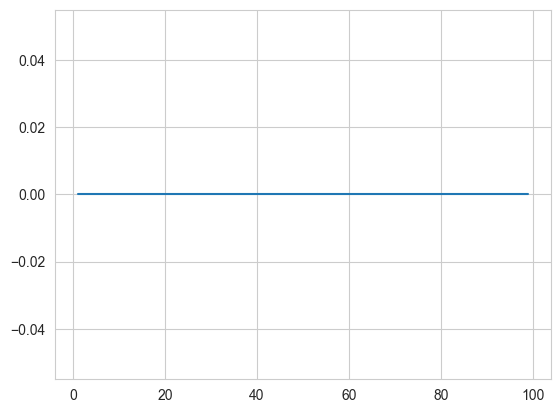

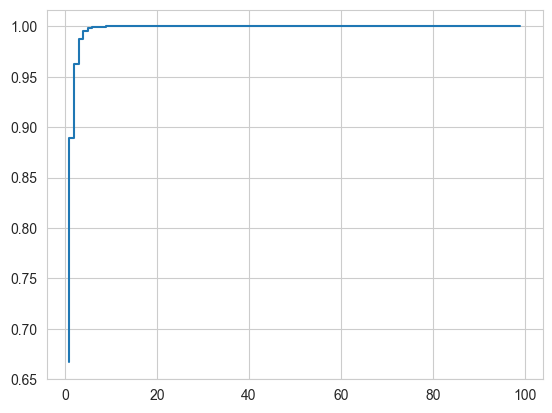

In [19]:
plt.step(env.possible_states(), policy)
plt.show()
plt.step(env.possible_states(), values[1:-1])
plt.show()

In [20]:
env = Environment(0.25, 100)
values = np.zeros(env.goal+1)
policy = iterate(env, values, 1e-20)

Delta: 0.822021484375, Theta: 1e-20
Delta: 0.190673828125, Theta: 1e-20
Delta: 0.042724609375, Theta: 1e-20
Delta: 0.01068115234375, Theta: 1e-20
Delta: 0.0026702880859375, Theta: 1e-20
Delta: 0.000667572021484375, Theta: 1e-20
Delta: 0.00011587142944335938, Theta: 1e-20
Delta: 2.1725893020629883e-05, Theta: 1e-20
Delta: 5.431473255157471e-06, Theta: 1e-20
Delta: 1.3578683137893677e-06, Theta: 1e-20
Delta: 3.394670784473419e-07, Theta: 1e-20
Delta: 3.580316842999309e-08, Theta: 1e-20
Delta: 6.713094080623705e-09, Theta: 1e-20
Delta: 5.31016230986836e-10, Theta: 1e-20
Delta: 1.32754057746709e-10, Theta: 1e-20
Delta: 3.318851443667725e-11, Theta: 1e-20
Delta: 6.222846023196116e-12, Theta: 1e-20
Delta: 1.1667836835593803e-12, Theta: 1e-20
Delta: 2.916959208898451e-13, Theta: 1e-20
Delta: 7.292398022246127e-14, Theta: 1e-20
Delta: 1.8230995055615318e-14, Theta: 1e-20
Delta: 1.923808334858279e-15, Theta: 1e-20
Delta: 3.608224830031759e-16, Theta: 1e-20
Delta: 5.551115123125783e-17, Theta: 1

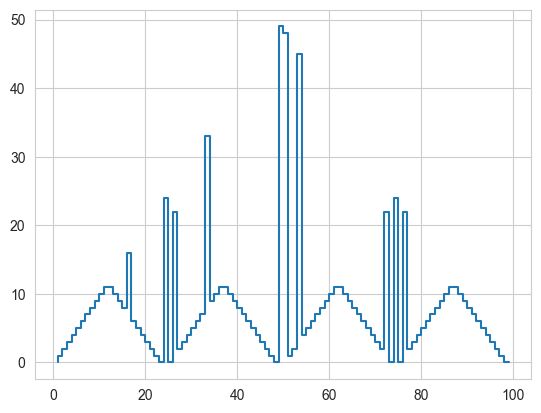

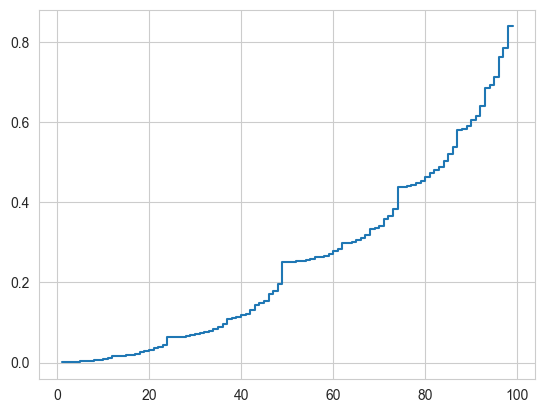

In [21]:
plt.step(env.possible_states(), policy)
plt.show()
plt.step(env.possible_states(), values[1:-1])
plt.show()